# Text-to-Speech Singlish

Text to Melspectrogram using Tacotron2 and FastSpeech2, trained on Singapore National Speech Corpus, https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-singlish](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-singlish).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### Tacotron2 description

1. Malaya-speech Tacotron2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### FastSpeech2 description

1. Malaya-speech FastSpeech2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.
3. Cannot generate more than melspectrogram longer than 2000 timestamp, it will throw an error. Make sure the texts are not too long.

### GlowTTS description

1. Malaya-speech GlowTTS will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### List available Tacotron2

In [2]:
malaya_speech.tts.available_tacotron2()

Size (MB) Quantized Size (MB) Combined loss  \
male                  104                26.3        0.1838   
female                104                26.3        0.1887   
husein                104                26.3        0.1165   
haqkiem               104                26.3        0.1375   
female-singlish       104                26.3        0.0923   
yasmin                104                26.3       0.06874   
osman                 104                26.3       0.06911   

                Understand punctuation Is lowercase  
male                              True         True  
female                            True         True  
husein                            True         True  
haqkiem                           True         True  
female-singlish                   True         True  
yasmin                            True        False  
osman                             True        False

### List available FastSpeech2

In [3]:
malaya_speech.tts.available_fastspeech2()

Size (MB) Quantized Size (MB) Combined loss  \
male                  125                31.7           1.8   
female                125                31.7         1.932   
husein                125                31.7        0.5832   
haqkiem               125                31.7        0.5663   
female-singlish       125                31.7        0.5112   
yasmin                125                31.7        0.7212   
yasmin-small         32.9                 8.5        0.7994   
osman                 125                31.7        0.7341   
osman-small          32.9                 8.5        0.8182   

                Understand punctuation Is lowercase  
male                              True         True  
female                            True         True  
husein                            True         True  
haqkiem                           True         True  
female-singlish                   True         True  
yasmin                            True        False  
yasmin-small                      True        False  
osman                             True        False  
osman-small                       True        False

### List available GlowTTS

In [4]:
malaya_speech.tts.available_glowtts()

Size (MB) Quantized Size (MB) Combined loss  \
male                  119                27.6        -1.429   
female                119                27.6        -1.464   
haqkiem               119                27.6        -1.649   
female-singlish       119                27.6        -1.728   
yasmin                119                27.6        -1.908   
osman                 119                27.6        -1.908   
multispeaker          404                79.9        -1.882   

                Understand punctuation Is lowercase  
male                              True         True  
female                            True         True  
haqkiem                           True         True  
female-singlish                   True         True  
yasmin                            True        False  
osman                             True        False  
multispeaker                      True         True

### Load Tacotron2 model

Read more about Tacotron2 model at https://malaya-speech.readthedocs.io/en/latest/tts-tacotron2-model.html

In [5]:
tacotron = malaya_speech.tts.tacotron2(model = 'female-singlish')
quantized_tacotron = malaya_speech.tts.tacotron2(model = 'female-singlish', quantized = True)

Load quantized model will cause accuracy drop.


### Load FastSpeech2 model

Read more about FastSpeech2 model at https://malaya-speech.readthedocs.io/en/latest/tts-fastspeech2-model.html

In [14]:
fastspeech = malaya_speech.tts.fastspeech2(model = 'female-singlish')
quantized_fastspeech = malaya_speech.tts.fastspeech2(model = 'female-singlish', quantized = True)

### Load GlowTTS model

Read more about GlowTTS model at https://malaya-speech.readthedocs.io/en/latest/tts-glowtts-model.html

In [15]:
glowtts = malaya_speech.tts.glowtts(model = 'female-singlish')
quantized_glowtts = malaya_speech.tts.glowtts(model = 'female-singlish', quantized = True)

### Predict Tacotron2

```python
def predict(self, string):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Dict[string, decoder-output, mel-output, universal-output, alignment]
    """
```

It only able to predict 1 text for single feed-forward.

In [8]:
string1 = 'PETALING JAYA: Former prime minister Najib Razak has criticised the Inland Revenue Board’s (LHDN) move to serve him a bankruptcy notice, which his legal team had earlier called a political ploy.'

In [16]:
%%time

r = tacotron.predict(string1)

CPU times: user 3.3 s, sys: 148 ms, total: 3.45 s
Wall time: 2.66 s


In [17]:
%%time

quantized_r = quantized_tacotron.predict(string1)

CPU times: user 3.46 s, sys: 156 ms, total: 3.61 s
Wall time: 3.33 s


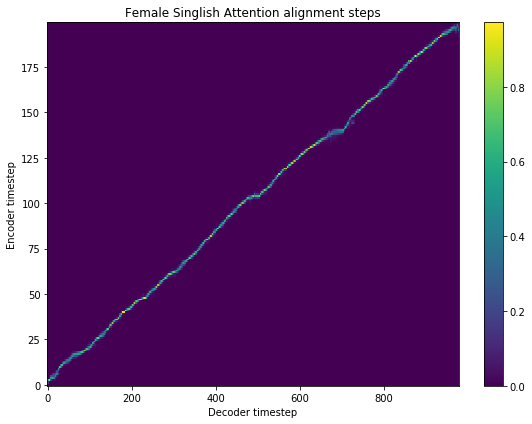

In [18]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    r['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

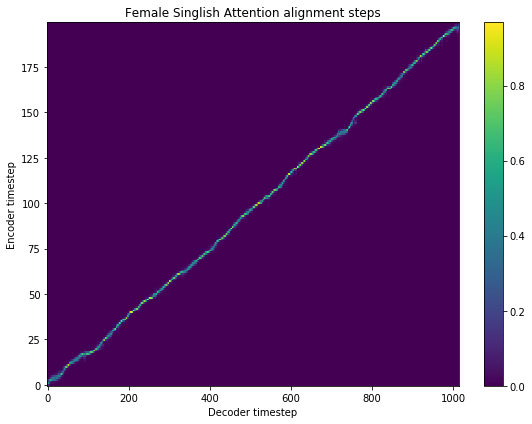

In [19]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    quantized_r['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

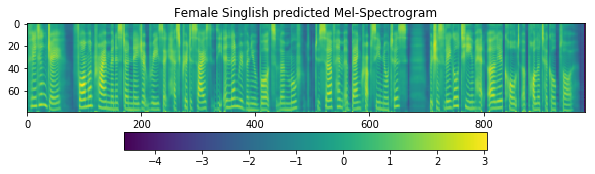

In [20]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

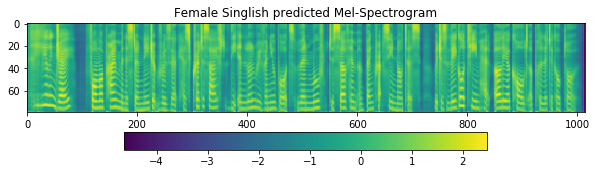

In [21]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(quantized_r['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Predict FastSpeech2

```python
def predict(
    self,
    string,
    speed_ratio: float = 1.0,
    f0_ratio: float = 1.0,
    energy_ratio: float = 1.0,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    speed_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.
    f0_ratio: float, optional (default=1.0)
        Increase this variable will increase frequency, low frequency will generate more deeper voice.
    energy_ratio: float, optional (default=1.0)
        Increase this variable will increase loudness.

    Returns
    -------
    result: Dict[string, decoder-output, universal-output, mel-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [22]:
%%time

r_fastspeech = fastspeech.predict(string1)

CPU times: user 1.29 s, sys: 90 ms, total: 1.38 s
Wall time: 234 ms


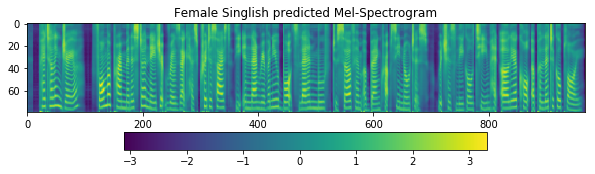

In [23]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_fastspeech['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Predict GlowTTS

```python
def predict(
    self,
    string,
    temperature: float = 0.3333,
    length_ratio: float = 1.0,
    **kwargs,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    temperature: float, optional (default=0.3333)
        Decoder model trying to decode with encoder(text) + random.normal() * temperature.
    length_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.

    Returns
    -------
    result: Dict[string, ids, mel-output, alignment, universal-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [10]:
%%time

r_glowtts = glowtts.predict(string1)

CPU times: user 607 ms, sys: 55.1 ms, total: 662 ms
Wall time: 133 ms


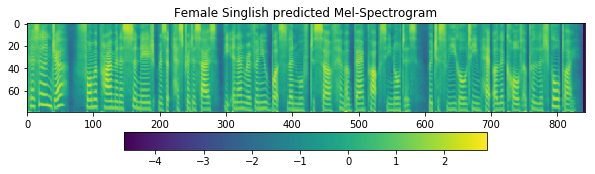

In [11]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_glowtts['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Load Vocoder model

There is only 1 way to synthesize melspectrogram output from Singlish TTS models,

1. If you are going to use universal MelGAN, use `universal-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-universal-melgan.html

In [12]:
vocoder = malaya_speech.vocoder.melgan(model = 'universal-1024')

In [25]:
y_ = vocoder(r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [26]:
y_ = vocoder(quantized_r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [27]:
y_ = vocoder(r_fastspeech['universal-output'])
ipd.Audio(y_, rate = 22050)

In [13]:
y_ = vocoder(r_glowtts['universal-output'])
ipd.Audio(y_, rate = 22050)

### Predict Bahasa text

In [28]:
string = 'husein zolkepli sangatlah comel, ketiak wangi dan mempunyai baby yang comel. Husein juga suka mandi pada waktu pagi dan petang sambil menggunakan sabun lifeboy.'

In [29]:
%%time

r = tacotron.predict(string)

CPU times: user 5.16 s, sys: 164 ms, total: 5.32 s
Wall time: 4.58 s


In [30]:
%%time

quantized_r = quantized_tacotron.predict(string)

CPU times: user 3.09 s, sys: 129 ms, total: 3.22 s
Wall time: 2.66 s


In [31]:
%%time

r_fastspeech = fastspeech.predict(string)

CPU times: user 1.1 s, sys: 85.6 ms, total: 1.19 s
Wall time: 193 ms


In [32]:
y_ = vocoder(r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [33]:
y_ = vocoder(quantized_r['universal-output'])
ipd.Audio(y_, rate = 22050)

In [34]:
y_ = vocoder(r_fastspeech['universal-output'])
ipd.Audio(y_, rate = 22050)